<font size="5.5"><u><i>Phenomenological Waveforms Explorer</i></u></font>

<font size="4">Exploratory analysis of core-collapse supernova (CCSN) phenomenological gravitational wave signals.</font>
<br/>
<font size="4">Author: Manuel David Morales</font>

## 1. Library imports

In [1]:
# Data analysis
import numpy as np 
import pandas as pd

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib import colors

# Files/folders management
import os, glob, sys, re

# Scientific computing
from scipy import signal

# Garbage collector
import gc

# Toolbox functions
from Toolbox import extract_WFinfo, resample_gw, SNR, SNR_PyCBC, WaveletTF_transform, Morlet_wavelet

The history saving thread hit an unexpected error (OperationalError('no such table: history')).History will not be written to the database.


## 2. Read files

In [2]:
# Important remarks:

# (1) In this script, we work with CCSNe phenomenological waveforms, which come from a 
#     a simplifed model in order to mimick the high frequency feature (usually referred
#     as the "g-mode") in time-frequency representation, which in the physical scenario
#     carries information about the pulsations of proto-neutron star progenitors.

# (2) This model was firstly proposed by Astone et al Phys. Rev. D 98, 122002 (2018).
#     Later, we reproduced this in Tiznado-Alonso et al, Research in Computing Science 152(6),
#     259 (2023). The waveforms have a sampling frequency fs = 16,384 Hz and were generated
#     by a free code available on: https://github.com/CesarTiznado/SignalGenerator_Phen.

# ------> Specify folders/files

# Class 1 waveforms
wf_dir_slo_rot = '/home/manuel/Research Projects/GW Data analysis/GitHub/CCSNeHFGW_ResNetClass/Waveforms_orig/Phen/class1/'
wf_files_slo_rot = sorted(glob.glob(wf_dir_slo_rot + '*.csv'))
#display(wf_files_slo_rot)

# Class 2 waveforms
wf_dir_mod_rot = '/home/manuel/Research Projects/GW Data analysis/GitHub/CCSNeHFGW_ResNetClass/Waveforms_orig/Phen/class2/'
wf_files_mod_rot = sorted(glob.glob(wf_dir_mod_rot + '*.csv'))
#display(wf_files_mod_rot)

# Class 3 waveforms
wf_dir_rap_rot = '/home/manuel/Research Projects/GW Data analysis/GitHub/CCSNeHFGW_ResNetClass/Waveforms_orig/Phen/class3/'
wf_files_rap_rot = sorted(glob.glob(wf_dir_rap_rot + '*.csv'))
#display(wf_files_rap_rot)

In [3]:
# Remark: Class of the waveform is given by the slope of its HFF.

#    Class 1 --> HFF slope from 1,620 to 4,990
#    Class 2 --> HFF slope from 1,450 to 1,620
#    Class 3 --> HFF slope from 950 to 1,450

# ------> Class 1 waveform

# Select a file
# -------------------------------------
i = 3    # Options: 0, 1, 2, 3,...
# -------------------------------------

#df = pd.read_csv(wf_files_slo_rot[i], usecols=['H', 'Time'])
df = pd.read_csv(wf_files_slo_rot[i], usecols=['H'])
wf_slo_rot = df['H'].to_numpy()
#pb_time_slo_rot = df['Time'].to_numpy()

print("File read:", wf_files_slo_rot[i])
#display(wf_slo_rot)
#display(pb_time_slo_rot)

# ------> Class 2 waveform

# Select a file
# -------------------------------------
j = 9    # Options: 0, 1, 2, 3,...
# -------------------------------------

#df = pd.read_csv(wf_files_mod_rot[j], usecols=['H', 'Time'])
df = pd.read_csv(wf_files_mod_rot[j], usecols=['H'])
wf_mod_rot = df['H'].to_numpy()
#pb_time_mod_rot = df['Time'].to_numpy()

print("File read:", wf_files_mod_rot[j])
#display(wf_mod_rot)
#display(pb_time_mod_rot)

# ------> Class 3 waveform

# Select a file
# -------------------------------------
k = 9    # Options: 0, 1, 2, 3,...
# -------------------------------------

#df = pd.read_csv(wf_files_rap_rot[k], usecols=['H', 'Time'])
df = pd.read_csv(wf_files_rap_rot[k], usecols=['H'])
wf_rap_rot = df['H'].to_numpy()
#pb_time_rap_rot = df['Time'].to_numpy()

print("File read:", wf_files_rap_rot[k])
#display(wf_rap_rot)
#display(pb_time_rap_rot)

File read: /home/manuel/Research Projects/GW Data analysis/GitHub/CCSNeHFGW_ResNetClass/Waveforms_orig/Phen/class1/Slow_run1H102_Slope2108_f0(126.63)_f1(3416.08).csv
File read: /home/manuel/Research Projects/GW Data analysis/GitHub/CCSNeHFGW_ResNetClass/Waveforms_orig/Phen/class2/Moder_run1H108_Slope1505_f0(108.14)_f1(1774.62).csv
File read: /home/manuel/Research Projects/GW Data analysis/GitHub/CCSNeHFGW_ResNetClass/Waveforms_orig/Phen/class3/Rapid_run1H108_Slope935_f0(105.28)_f1(1148.24).csv


### 2.1 Extract values from file names

In [4]:
# ------> Class 1 waveform
slope_slo, f0_slo, f1_slo = extract_WFinfo(wf_files_slo_rot[i])

# Prints
print("Class 1 waveform")
print("---------------------------")
print("Slope =", slope_slo)
print("f0 =", f0_slo)
print("f1 =", f1_slo)
print("")

# ------> Class 1 waveform
slope_mod, f0_mod, f1_mod = extract_WFinfo(wf_files_mod_rot[j])

# Prints
print("Class 2 waveform")
print("---------------------------")
print("Slope =", slope_mod)
print("f0 =", f0_mod)
print("f1 =", f1_mod)
print("")

# ------> Class 1 waveform
slope_rap, f0_rap, f1_rap = extract_WFinfo(wf_files_rap_rot[k])

# Prints
print("Class 3 waveform")
print("---------------------------")
print("Slope =", slope_rap)
print("f0 =", f0_rap)
print("f1 =", f1_rap)
print("")

Class 1 waveform
---------------------------
Slope = 2108
f0 = 126.63
f1 = 3416.08

Class 2 waveform
---------------------------
Slope = 1505
f0 = 108.14
f1 = 1774.62

Class 3 waveform
---------------------------
Slope = 935
f0 = 105.28
f1 = 1148.24



## 3. Waveform resampling

In [5]:
# ------> Create time arrays

fs = 16384   # sampling frequency (Hz)
ts = 1 / fs  # sampling time (seconds)

pb_time_s = []
pb_time_m = []
pb_time_r = []

for i in range(len(wf_slo_rot)):
    pb_time_s.append(i*ts)

for i in range(len(wf_mod_rot)):
    pb_time_m.append(i*ts)
    
for i in range(len(wf_rap_rot)):
    pb_time_r.append(i*ts)

pb_time_slo_rot = np.array(pb_time_s)
pb_time_mod_rot = np.array(pb_time_m)
pb_time_rap_rot = np.array(pb_time_r)

# ------> Resampling of the time domain to fs = 4096 Hz

fs_after = 4096

t_slo, strain_slo = resample_gw(pb_time_slo_rot, wf_slo_rot, fs_after)
t_mod, strain_mod = resample_gw(pb_time_mod_rot, wf_mod_rot, fs_after)
t_rap, strain_rap = resample_gw(pb_time_rap_rot, wf_rap_rot, fs_after)

## 4. Waveform rescaling

In [6]:
# ------> Rescale strain signals

wf_factor = 1.0e-21 # options: 1.0e-21*, 1.0e-22*, 2.0e-22

h_slo = strain_slo * wf_factor
h_mod = strain_mod * wf_factor
h_rap = strain_rap * wf_factor

## 5. Compute SNR values (deactivated)

### 5.1. Scipy implementation

In [7]:
%%script false --no-raise-error # WARNING: DEACTIVATED CELL

# ------> Load PSD of Detector's noise

# Remark: For the moment, we only consider L1 noise data

#df = pd.read_csv("psd_H1.txt")
#fpsd_H1 = df['frequency'].to_numpy()
#psd_H1  = df['power spectral density'].to_numpy()

df = pd.read_csv("psd_L1.txt")
fpsd_L1 = df['frequency'].to_numpy()
psd_L1  = df['power spectral density'].to_numpy()

#df = pd.read_csv("psd_V1.txt")
#fpsd_V1 = df['frequency'].to_numpy()
#psd_V1  = df['power spectral density'].to_numpy()

In [8]:
%%script false --no-raise-error # WARNING: DEACTIVATED CELL

# ------> Compute SNR values

SNR_slo = SNR(h_slo,t_slo,fpsd_L1,psd_L1,0)
print("SNR value [Slo rot progenitor, L1 noise]: ", SNR_slo)

SNR_mod = SNR(h_mod,t_mod,fpsd_L1,psd_L1,0)
print("SNR value [Mod rot progenitor, L1 noise]: ", SNR_mod)

SNR_rap = SNR(h_rap,t_rap,fpsd_L1,psd_L1,0)
print("SNR value [Rap rot progenitor, L1 noise]: ", SNR_rap)

### 5.2. PyCBC implementation

Remark: For now, we can omit this implementation.

## 6. Plot waveforms

In [9]:
%%script false --no-raise-error # WARNING: DEACTIVATED CELL

t_max = np.maximum(np.maximum(np.max(t_slo, axis=0),np.max(t_mod, axis=0)),np.max(t_rap, axis=0))
t_max = t_max + 0.05

plt.figure(1, figsize=(8,5))
plt.plot(t_slo, h_slo, label='Slowing rotating progenitor')
plt.title("Phenomenological waveforms", fontsize=18)
plt.xlabel('post-bounce time [sec]', fontsize=16)
plt.ylabel('strain', fontsize=16)
plt.xlim(right=t_max)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
plt.figure(1).clear()
gc.collect()

plt.figure(2, figsize=(8,5))
plt.plot(t_mod, h_mod,label='Moderate rotating progenitor')
plt.title("Phenomenological waveforms", fontsize=18)
plt.xlabel('post-bounce time [sec]', fontsize=16)
plt.ylabel('strain', fontsize=16)
plt.xlim(right=t_max)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
plt.figure(1).clear()
gc.collect()

plt.figure(3, figsize=(8,5))
plt.plot(t_rap, h_rap,label='Rapidly rotating progenitor')
plt.title("Phenomenological waveforms", fontsize=18)
plt.xlabel('post-bounce time [sec]', fontsize=16)
plt.ylabel('strain', fontsize=16)
plt.xlim(right=t_max)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
plt.figure(1).clear()
gc.collect()

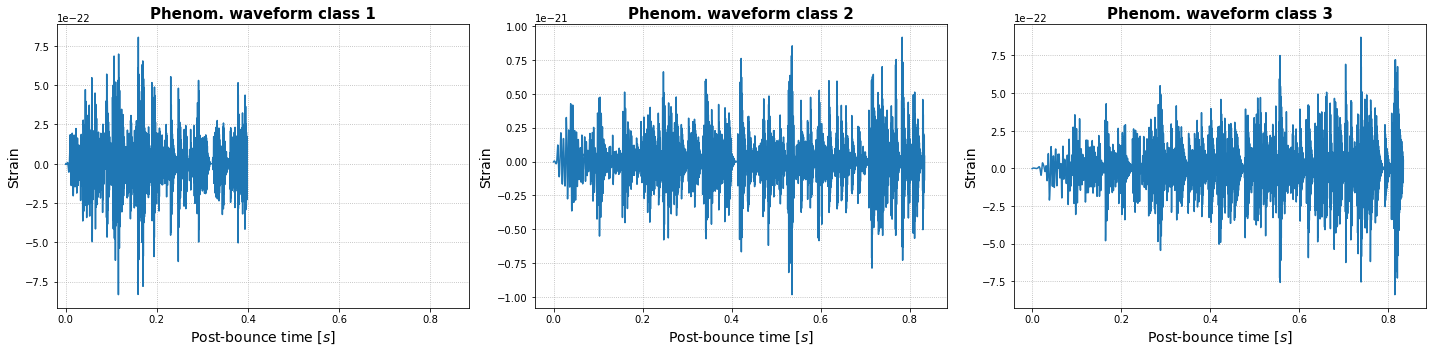

In [10]:
# ------> Plot waveforms (printable plot)

t_max = np.maximum(np.maximum(np.max(t_slo, axis=0),np.max(t_mod, axis=0)),np.max(t_rap, axis=0))
t_max = t_max + 0.05

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

ax1.plot(t_slo, h_slo)
ax1.set_title("Phenom. waveform class 1", fontsize=15, fontweight="bold")
ax1.set_xlabel('Post-bounce time [$s$]', fontsize=14)
ax1.set_ylabel('Strain', fontsize=14)
ax1.set_xlim(right=t_max)
ax1.grid(which='both', linestyle=':')

ax2.plot(t_mod, h_mod)
ax2.set_title("Phenom. waveform class 2", fontsize=15, fontweight="bold")
ax2.set_xlabel('Post-bounce time [$s$]', fontsize=14)
ax2.set_ylabel('Strain', fontsize=14)
ax2.set_xlim(right=t_max)
ax2.grid(which='both', linestyle=':')

ax3.plot(t_rap, h_rap)
ax3.set_title("Phenom. waveform class 3", fontsize=15, fontweight="bold")
ax3.set_xlabel('Post-bounce time [$s$]', fontsize=14)
ax3.set_ylabel('Strain', fontsize=14)
ax3.set_xlim(right=t_max)
ax3.grid(which='both', linestyle=':')

fig.tight_layout()

# Save scalograms
fig.savefig("../Figures/waveform(phen)_timeseries.eps", format="eps")
fig.savefig("../Figures/waveform(phen)_timeseries.pdf", format="pdf")

## 7. Plot spectrograms

### 7.1 Consecutive FFTs

In [15]:
wnd="hamming" # select window

freq_slo, time_slo, Sxx_slo = signal.spectrogram(h_slo, fs_after, window=wnd)
freq_mod, time_mod, Sxx_mod = signal.spectrogram(h_mod, fs_after, window=wnd)
freq_rap, time_rap, Sxx_rap = signal.spectrogram(h_rap, fs_after, window=wnd)

Text(0.5, 1.0, 'Waveform class 3')

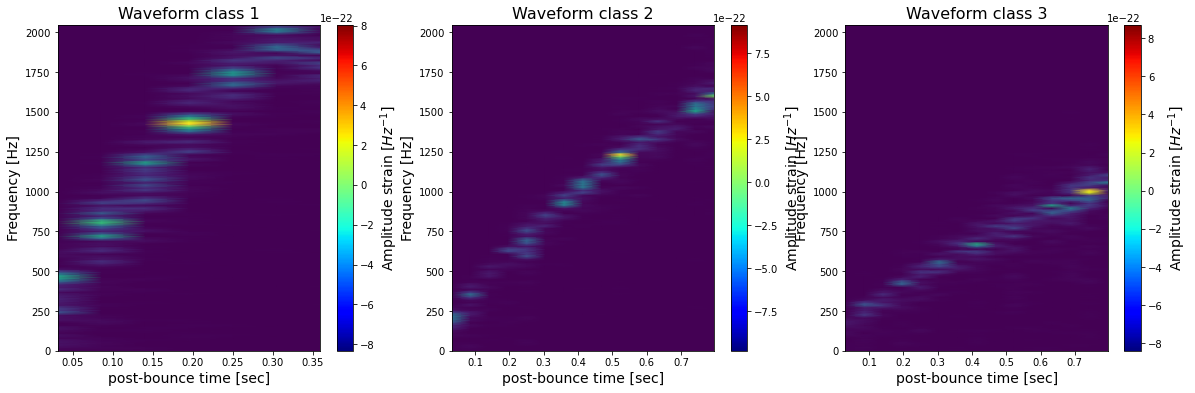

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

ax1.pcolormesh(time_slo, freq_slo, Sxx_slo, shading='gouraud')
norm = colors.Normalize(h_slo.min(), h_slo.max())
mappable = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.jet)
fig.colorbar(mappable, ax=ax1).set_label(label="Amplitude strain [$Hz^{-1}$]", size=14)

ax2.pcolormesh(time_mod, freq_mod, Sxx_mod, shading='gouraud')
norm = colors.Normalize(h_mod.min(), h_mod.max())
mappable = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.jet)
fig.colorbar(mappable, ax=ax2).set_label(label="Amplitude strain [$Hz^{-1}$]", size=14)

ax3.pcolormesh(time_rap, freq_rap, Sxx_rap, shading='gouraud')
norm = colors.Normalize(h_rap.min(), h_rap.max())
mappable = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.jet)
fig.colorbar(mappable, ax=ax3).set_label(label="Amplitude strain [$Hz^{-1}$]", size=14)

# Set axis labels
ax1.set_xlabel('post-bounce time [sec]', fontsize=14)
ax1.set_ylabel('Frequency [Hz]', fontsize=14)
ax2.set_xlabel('post-bounce time [sec]', fontsize=14)
ax2.set_ylabel('Frequency [Hz]', fontsize=14)
ax3.set_xlabel('post-bounce time [sec]', fontsize=14)
ax3.set_ylabel('Frequency [Hz]', fontsize=14)

# Set titles
ax1.set_title('Waveform class 1', fontsize=16)
ax2.set_title('Waveform class 2', fontsize=16)
ax3.set_title('Waveform class 3', fontsize=16)

### 7.2 Morlet Wavelets

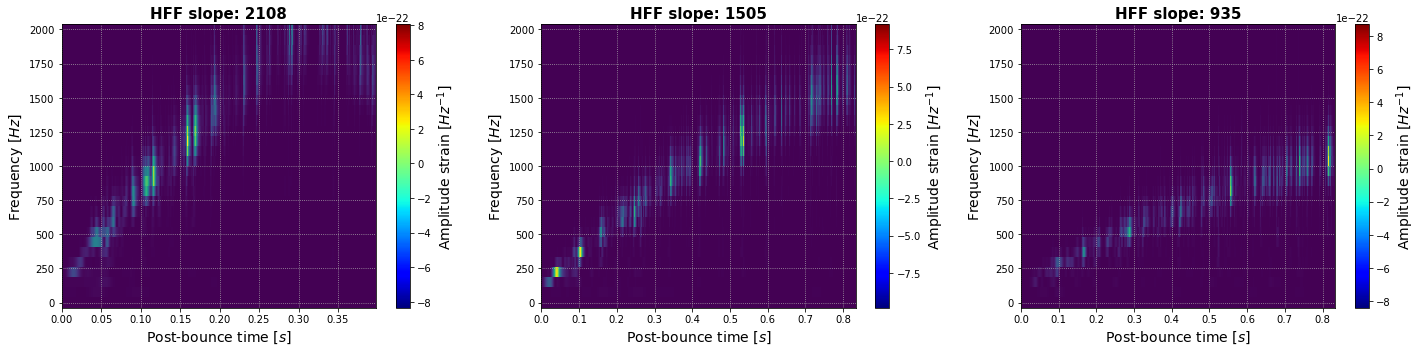

In [17]:
# ------> Wavelet scalograms (printable plot)

time_slo, freq_slo, WL_slo = WaveletTF_transform(h_slo, fs_after, 1, 2000, 75, 7, 0)
time_mod, freq_mod, WL_mod = WaveletTF_transform(h_mod, fs_after, 1, 2000, 75, 7, 0)
time_rap, freq_rap, WL_rap = WaveletTF_transform(h_rap, fs_after, 1, 2000, 75, 7, 0)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

ax1.pcolormesh(time_slo, freq_slo, WL_slo, shading='auto')
norm = colors.Normalize(h_slo.min(), h_slo.max())
mappable = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.jet)
fig.colorbar(mappable, ax=ax1).set_label(label="Amplitude strain [$Hz^{-1}$]", size=14)

ax2.pcolormesh(time_mod, freq_mod, WL_mod, shading='auto')
norm = colors.Normalize(h_mod.min(), h_mod.max())
mappable = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.jet)
fig.colorbar(mappable, ax=ax2).set_label(label="Amplitude strain [$Hz^{-1}$]", size=14)

ax3.pcolormesh(time_rap, freq_rap, WL_rap, shading='auto')
norm = colors.Normalize(h_rap.min(), h_rap.max())
mappable = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.jet)
fig.colorbar(mappable, ax=ax3).set_label(label="Amplitude strain [$Hz^{-1}$]", size=14)

# Set axis labels
ax1.set_xlabel('Post-bounce time [$s$]', fontsize=14)
ax1.set_ylabel('Frequency [$Hz$]', fontsize=14)
ax2.set_xlabel('Post-bounce time [$s$]', fontsize=14)
ax2.set_ylabel('Frequency [$Hz$]', fontsize=14)
ax3.set_xlabel('Post-bounce time [$s$]', fontsize=14)
ax3.set_ylabel('Frequency [$Hz$]', fontsize=14)

# Set titles
ax1.set_title('HFF slope: ' + slope_slo, fontsize=15, fontweight="bold")
ax2.set_title('HFF slope: ' + slope_mod, fontsize=15, fontweight="bold")
ax3.set_title('HFF slope: ' + slope_rap, fontsize=15, fontweight="bold")

# Set grids
ax1.grid(which='both', linestyle=':')
ax2.grid(which='both', linestyle=':')
ax3.grid(which='both', linestyle=':')

fig.tight_layout()

# Save scalograms
fig.savefig("../Figures/waveform(phen)_scalogram.eps", format="eps")
fig.savefig("../Figures/waveform(phen)_scalogram.pdf", format="pdf")

## 8. Save modified waveforms

In [16]:
%%script false --no-raise-error # WARNING: DEACTIVATED CELL

# Compute waveform duration (in seconds)
dur_slo = t_slo[-1]-t_slo[0]
dur_mod = t_mod[-1]-t_mod[0]
dur_rap = t_rap[-1]-t_rap[0]

# Convert durations to strings
d_s = f'{dur_slo:.12f}'
d_m = f'{dur_mod:.12f}'
d_r = f'{dur_rap:.12f}'

# ------> Slowly/Moderated/Rapidly rotating progenitors

df_slo = pd.DataFrame({"time" : t_slo, "strain" : h_slo})
df_mod = pd.DataFrame({"time" : t_mod, "strain" : h_mod})
df_rap = pd.DataFrame({"time" : t_rap, "strain" : h_rap})

df_slo.to_csv("strain_wf_slo_" + "Slope_" + slope_slo + "_f0_" + f0_slo + "_f1_" + f1_slo + "_dur_" + d_s + ".txt", index=False)
df_slo.to_csv("strain_wf_mod_" + "Slope_" + slope_mod + "_f0_" + f0_mod + "_f1_" + f1_mod + "_dur_" + d_m + ".txt", index=False)
df_slo.to_csv("strain_wf_rap_" + "Slope_" + slope_rap + "_f0_" + f0_rap + "_f1_" + f1_rap + "_dur_" + d_r + ".txt", index=False)